# Lab 2 of Quantum Computing
Muhammad Faryad

In [3]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram

In [18]:
from qiskit.quantum_info import Statevector

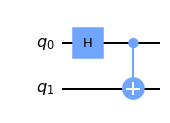

In [16]:
mycircuit=QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

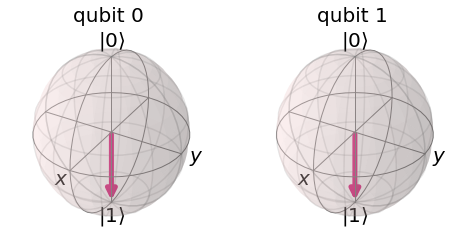

In [23]:
from qiskit.visualization import plot_bloch_multivector
sv=Statevector.from_label('11')
plot_state_qsphere(sv.data)
plot_bloch_multivector(sv)

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


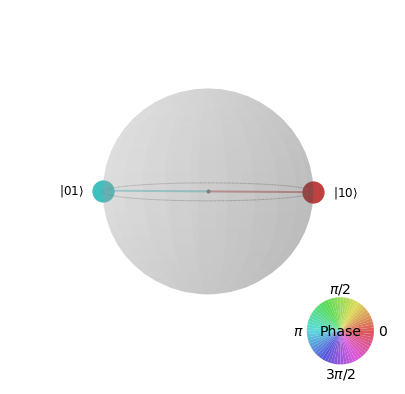

In [24]:
newsv=sv.evolve(mycircuit)
print(newsv)
plot_bloch_multivector(newsv)
plot_state_qsphere(newsv.data)

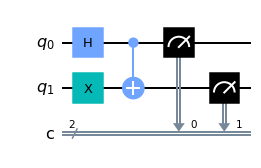

In [31]:
mycircuit=QuantumCircuit(2,2)
mycircuit.x(1)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.measure(0,0)
mycircuit.measure(1,1)

mycircuit.draw('mpl')

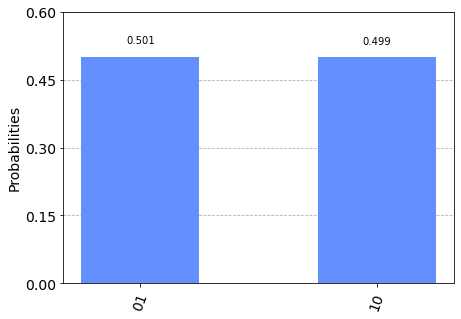

In [36]:
from qiskit import Aer, execute, BasicAer
simulator=Aer.get_backend('qasm_simulator')
result=execute(mycircuit, simulator, shots=100000).result()
counts=result.get_counts(mycircuit)
plot_histogram(counts)

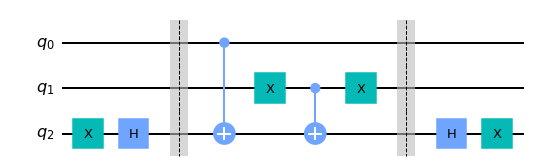

In [44]:
n=2
epk=QuantumCircuit(n+1)

#put nth qubit in |-> state
epk.x(n)
epk.h(n)
epk.barrier()
epk.cx(0,n)
epk.x(1)
epk.cx(1,n)
epk.x(1)
epk.barrier()
epk.h(n)
epk.x(n)
epk.draw('mpl')

In [46]:
sv=Statevector.from_label('011')
print(sv)
newsv=sv.evolve(epk)
print(newsv)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Statevector([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
             -1.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j,  2.23711432e-17+0.j],
            dims=(2, 2, 2))
